| Var&$$(a, \sigma^2)$$| $$\gamma$$ | n | M | K | С.В. Z | С.В. W |
| --- | --- | --- | --- | --- | --- | --- |
| 5 (-1;16) | 0.9 | 16 | 1950 | 180 | $$Z =  \dfrac{(n-1)S^2}{\sigma^2} $$| $$W=\frac{1}{4}\sum_{i=1}^{4}U_i$$ $$Где\ U_i\ -\ случайная\ выборка\newline из\ 4\ значений\ св\ U,\newline имеющей\ распределение\ \chi^2(3)$$|


In [20]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sts
import pandas as pd
import math
import statistics

In [21]:
# consts
n = 16
a = -1
sigma = math.sqrt(16)
gamma = 0.9


# Часть I





## 1.

In [22]:
a =1 
sigma = 2
n = 500

sample = np.random.normal(loc=a, scale=sigma, size=n)

### 1.1 
Найти интервальную оценку (доверительный интервал) для математического ожидания случайной величины X, предполагая, что дисперсия случайной величины X известна

In [23]:
mean = sample.mean()
t = sts.norm.ppf((gamma/2)+0.5)
delta = t*sigma/math.sqrt(n)

In [75]:
print(f"Доверительный интервал для матожидания а \nпри известной дисперсии sigma = {sigma} при gamma = {gamma}: \n({mean - delta}, {mean + delta})")

Доверительный интервал для матожидания а 
при известной дисперсии sigma = 2 при gamma = 0.95: 
(0.9485638802229747, 1.2428042420550205)


In [77]:
print(f"Доверительный интервал by python: \n{sts.norm.interval(confidence=gamma, loc=sample.mean(), scale=sigma/math.sqrt(n))}")

Доверительный интервал by python: 
(0.8521715864456239, 1.6361571802616455)


### 1.2
Найти интервальную оценку (доверительный интервал) для математического ожидания случайной величины X, предполагая, что дисперсия случайной величины X известна

## 2
Зависимость длины доверительного интервала от надежности при неизменном объеме выборки

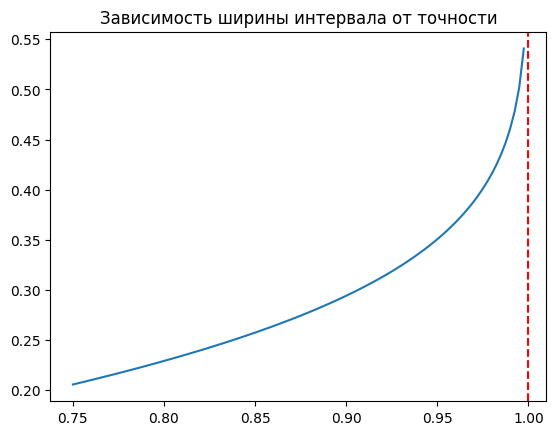

In [66]:
gamma_0 = 0.75
gamma_1 = 1
L = 100
h = (gamma_1 - gamma_0)/L
bounds = []
arr_gamma = []
for i in range(L):
    gamma = gamma_0+i*h
    tmp = sts.norm.interval(confidence=gamma, loc=sample.mean(), scale=sigma/math.sqrt(n))
    bounds.append(tmp[1]-tmp[0])
    arr_gamma.append(gamma)

plt.plot(arr_gamma, bounds)
plt.title("Зависимость ширины интервала от точности")
plt.axvline(x = 1, color = 'red', label = 'axvline - full height',linestyle = '--')

## 3
Построить зависимость длины доверительного интервала от объема выборки при неизменной надежности

Text(0.5, 1.0, 'Зависимость ширины интервала от длины выборки')

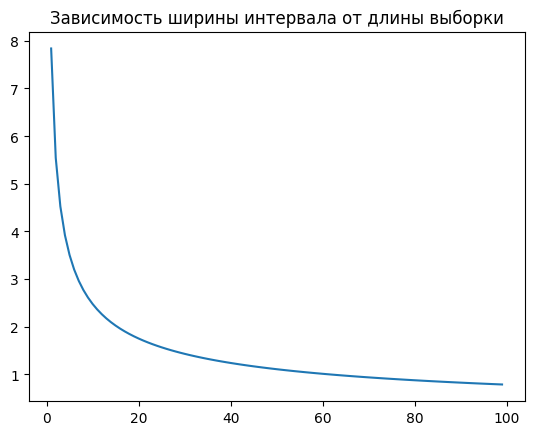

In [68]:
gamma = 0.95
L = 1000
arr_gamma = []
bounds.clear()
arr_len = []
for i in range(1, 100):
    sample = np.random.normal(loc=a, scale=sigma, size=i)
    tmp = sts.norm.interval(confidence=gamma, loc=sample.mean(), scale=sigma/math.sqrt(i))
    bounds.append(tmp[1]-tmp[0])
    arr_len.append(i)

    
plt.plot(arr_len, bounds) 
plt.title("Зависимость ширины интервала от длины выборки")



In [26]:
sts.t.interval(confidence=0.95, df=len(sample)-1, loc=np.mean(sample), scale=sts.sem(sample)) 


(0.9275223280050244, 1.2638457942729706)

## 4
Смоделировать M выборок из n значений нормально распределенной случайной величины X с параметрами (a, sigma^2)

In [73]:
M = 5000
n = 100
bounds.clear()
l = []
r = []
for i in range(M):
    sample = np.random.normal(loc=a, scale=sigma, size=n)
    tmp = sts.norm.interval(
        confidence=gamma, loc=sample.mean(), scale=sigma/math.sqrt(n))
    bounds.append(tmp)
    l.append(tmp[0])
    r.append(tmp[1])
x_l = pd.Series(data=l)
x_r = pd.Series(data=r)

count = ((x_l<a)&(x_r>a)).sum()
print(f"Оценка гамма = {count/M}")

Оценка гамма = 0.9504
